In [3]:
import torch 
import matplotlib.pyplot as plt

In [10]:
X = torch.arange(-20, 20, 0.01).reshape(-1, 1)
Y = torch.relu(X)

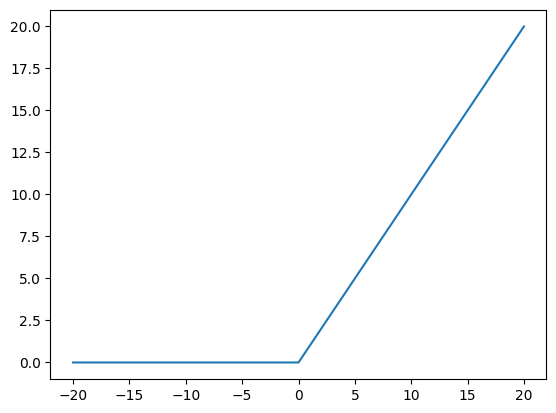

In [11]:
plt.plot(X, Y)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

(torch.Size([3200, 1]),
 torch.Size([800, 1]),
 torch.Size([3200, 1]),
 torch.Size([800, 1]))

In [7]:
from sklearn.metrics import mean_squared_error

### SVM

In [6]:
from sklearn.svm import SVR

In [8]:
model = SVR(kernel='linear')

In [14]:
model.fit(X_train, Y_train.squeeze())

SVR(kernel='linear')

In [15]:
preds_train, preds_val = model.predict(X_train), model.predict(X_val)
score_train, score_val = mean_squared_error(Y_train, preds_train), mean_squared_error(Y_val, preds_val)
score_train, score_val

(8.268528196043167, 8.61935819916695)

### ANN

In [20]:
device = 'cpu'

In [16]:
from torch import nn

class SimpleNN(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_features=1, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=1)
        )
    
    def forward(self, x):
        return self.layers(x)

In [19]:
from scripts.utils import make_dataloader

train_dataloader, val_dataloader = make_dataloader(X_train, Y_train, 32, True), make_dataloader(X_val, Y_val, 32) 

In [17]:
model = SimpleNN()

In [18]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters())
metric = torch.nn.MSELoss()

In [21]:
from scripts.train import train_model

history = train_model(
    model=model,
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    metric=metric,
    epochs=50,
    device=device
)

Training model for 50 epochs. Early stopping not enabled.
Epoch: 1 => Train loss: 7.340475, Train score: 7.340475, Val loss: 0.005599, Val score: 0.005599
Epoch: 2 => Train loss: 0.002253, Train score: 0.002253, Val loss: 0.000692, Val score: 0.000692
Epoch: 3 => Train loss: 0.000596, Train score: 0.000596, Val loss: 0.000464, Val score: 0.000464
Epoch: 4 => Train loss: 0.000436, Train score: 0.000436, Val loss: 0.000363, Val score: 0.000363
Epoch: 5 => Train loss: 0.000350, Train score: 0.000350, Val loss: 0.000302, Val score: 0.000302
Epoch: 6 => Train loss: 0.000287, Train score: 0.000287, Val loss: 0.000253, Val score: 0.000253
Epoch: 7 => Train loss: 0.000241, Train score: 0.000241, Val loss: 0.000218, Val score: 0.000218
Epoch: 8 => Train loss: 0.000207, Train score: 0.000207, Val loss: 0.000193, Val score: 0.000193
Epoch: 9 => Train loss: 0.000185, Train score: 0.000185, Val loss: 0.000166, Val score: 0.000166
Epoch: 10 => Train loss: 0.000174, Train score: 0.000174, Val loss: 0

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

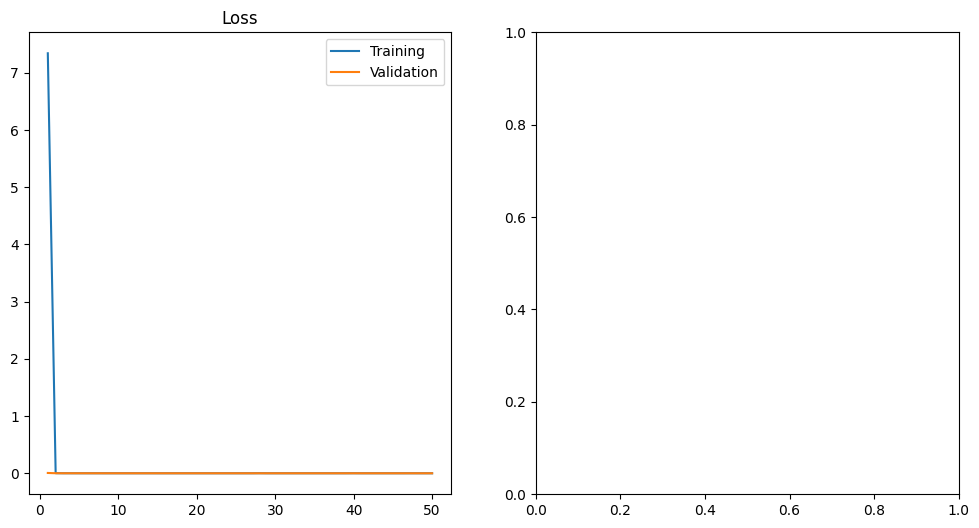

In [22]:
from scripts.utils import plot_train_history

plot_train_history(history)